<a href="https://colab.research.google.com/github/minolinesith/FYP/blob/CNN-Model/ayurvedicplantclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
train_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/train'

In [ ]:
valid_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/validation'

In [74]:
test_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/test'

In [ ]:
img_width = 224
img_height = 224

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 1601 files belonging to 8 classes.


In [ ]:
classes = train_data.class_names

In [ ]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 480 files belonging to 8 classes.


In [111]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 160 files belonging to 8 classes.


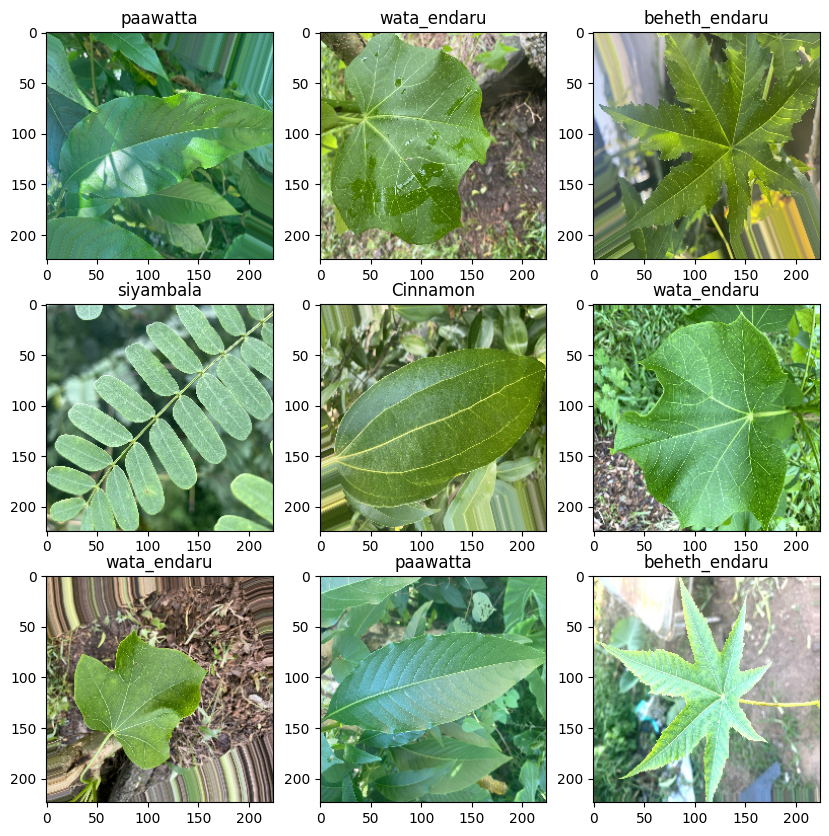

In [ ]:
plt.figure(figsize=(10,10))
for img, labels in train_data.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(classes[labels[i]])

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(256, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
epochs = 10
history = model.fit(train_data, validation_data = valid_data, epochs = epochs)

Epoch 1/10
161/161 [==============================] - 578s 4s/step - loss: 1.9908 - accuracy: 0.2911 - val_loss: 1.2893 - val_accuracy: 0.5458
Epoch 2/10
161/161 [==============================] - 110s 664ms/step - loss: 1.1056 - accuracy: 0.5953 - val_loss: 1.1933 - val_accuracy: 0.5583
Epoch 3/10
161/161 [==============================] - 110s 664ms/step - loss: 0.6755 - accuracy: 0.7651 - val_loss: 0.4891 - val_accuracy: 0.8396
Epoch 4/10
161/161 [==============================] - 111s 668ms/step - loss: 0.3441 - accuracy: 0.8888 - val_loss: 0.3459 - val_accuracy: 0.8687
Epoch 5/10
161/161 [==============================] - 129s 776ms/step - loss: 0.1678 - accuracy: 0.9394 - val_loss: 0.2172 - val_accuracy: 0.9167
Epoch 6/10
161/161 [==============================] - 107s 640ms/step - loss: 0.1008 - accuracy: 0.9700 - val_loss: 0.2134 - val_accuracy: 0.9292
Epoch 7/10
161/161 [==============================] - 129s 776ms/step - loss: 0.0728 - accuracy: 0.9725 - val_loss: 0.3284 - va

Text(0.5, 1.0, 'Loss')

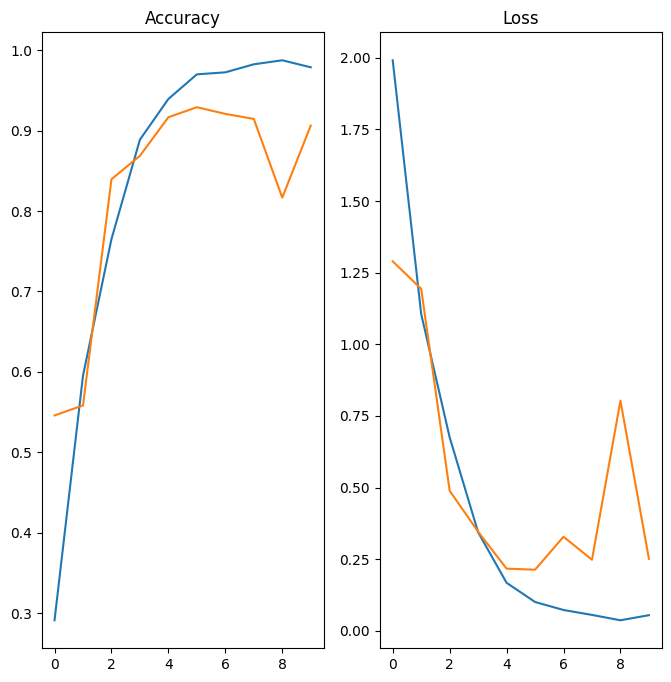

In [ ]:
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

8/8 [==============================] - 25s 3s/step - loss: 3.6476 - accuracy: 0.5000
Test Accuracy: 50.00%


In [ ]:
def predict_image(model, image):
  classes=train_data.class_names
  image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
  img_arr = tf.keras.utils.array_to_img(image)
  img_batch = tf.expand_dims(img_arr,0)
  predict = model.predict(img_batch)
  print('Leaf is of plant {} with an accuracy of {:0.2f}'.format(classes[np.argmax(predict)],np.max(predict)*100))

In [ ]:
image = 'IMG_1876.jpg'
predict_image(model, image)

In [ ]:
model.save('LifeVeda_classifier.h5')

## Testing the ensemble model

In [ ]:
from tensorflow.keras.models import load_model


model_path = '/content/drive/MyDrive/FYP/Ensemble Model/LifeVeda_Ensemble_averaging.h5'
# Step 2: Load the trained model
ensemble_model = load_model(model_path)


In [ ]:
def predict_image(model, image):
  classes=train_data.class_names
  image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
  img_arr = tf.keras.utils.array_to_img(image)
  img_batch = tf.expand_dims(img_arr,0)
  predict = model.predict(img_batch)
  print('Leaf is of plant {} with an accuracy of {:0.2f}'.format(classes[np.argmax(predict)],np.max(predict)*100))

In [112]:
test_loss, test_accuracy = ensemble_model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

16/16 [==============================] - 20s 1s/step - loss: 2.9074 - accuracy: 0.9062
Test Accuracy: 90.62%
